In [27]:
#Libraries
import pandas as pd
from utils.eda import *
from utils.clean import *
import requests
import numpy as np
import missingno as msno
import math
import matplotlib.pyplot as plt
import json
import pickle


#Load Data
data = pd.read_pickle('../data/data_prepare.pkl')

In [2]:
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_id,type_pass,trip_category,duration
0,602,2019-12-01 00:00,2019-12-01 00:10,3382,Carroll St & Smith St,40.680611,-73.994758,3304,6 Ave & 9 St,40.668127,-73.983776,41932,Subscriber,1970,1,1345,annual,round-trip,10.0
1,723,2019-12-01 00:00,2019-12-01 00:12,146,Hudson St & Reade St,40.716250,-74.009106,238,Bank St & Washington St,40.736197,-74.008592,15334,Subscriber,1997,1,1347,annual,round-trip,12.0
2,1059,2019-12-01 00:00,2019-12-01 00:17,500,Broadway & W 51 St,40.762288,-73.983362,3323,W 106 St & Central Park West,40.798186,-73.960591,40156,Subscriber,1961,1,1349,annual,round-trip,18.0
3,1257,2019-12-01 00:00,2019-12-01 00:21,340,Madison St & Clinton St,40.712690,-73.987763,340,Madison St & Clinton St,40.712690,-73.987763,40829,Subscriber,1994,1,1350,annual,round-trip,21.0
4,624,2019-12-01 00:00,2019-12-01 00:10,469,Broadway & W 53 St,40.763441,-73.982681,526,E 33 St & 5 Ave,40.747659,-73.984907,24934,Subscriber,1983,1,1351,annual,one-way,10.0


In [3]:
#Backup de original dataset
data_ = data.copy()

In [6]:
# remove spaces in column names
data_.columns = data_.columns.str.replace(' ', '_')

#### Limpieza de datos

In [8]:
# Change to lower categorical variables
cambiar_minusculas_variable(data_,'start_station_name')
cambiar_minusculas_variable(data_,'end_station_name')
cambiar_minusculas_variable(data_,'usertype')
cambiar_minusculas_variable(data_,'type_pass')
cambiar_minusculas_variable(data_,'trip_category')

In [9]:
data_.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bikeid                       int64
usertype                    object
birth_year                   int64
gender                       int64
trip_id                      int64
type_pass                   object
trip_category               object
duration                   float64
dtype: object

In [10]:
# Converting start and end times to datetime objects.
data_['starttime'] = pd.to_datetime(data_['starttime'])
data_['stoptime'] = pd.to_datetime(data_['stoptime'])

In [11]:
data_.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                          int64
gender                              int64
trip_id                             int64
type_pass                          object
trip_category                      object
duration                          float64
dtype: object

#### Análisis de datos

In [12]:
#Numeric variables
tabla_estadisticos_descriptivos_variables_numericas(data_)

,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,trip_id,duration
max,3.304262e+06,3911.000000,40.818299,-73.897950,3911.000000,40.818299,-73.897950,42046.000000,2003.000000,2.000000,9.565540e+05,55071.000000
min,6.100000e+01,72.000000,40.655400,-74.017134,72.000000,40.655400,-74.063913,14529.000000,1885.000000,0.000000,1.345000e+03,1.000000
mean,8.308397e+02,1666.618973,40.737843,-73.981574,1646.799030,40.737543,-73.981978,32915.938365,1979.448958,1.174272,4.789495e+05,13.847270
std,1.078565e+04,1492.957236,0.029825,0.019196,1490.930913,0.029444,0.019256,7997.229634,12.604304,0.491035,2.757455e+05,179.760645
q25,3.200000e+02,380.000000,40.719009,-73.994224,379.000000,40.719009,-73.994618,28716.000000,1969.000000,1.000000,2.401472e+05,5.000000
median,5.220000e+02,509.000000,40.739017,-73.984706,507.000000,40.738274,-73.985417,34101.000000,1982.000000,1.000000,4.789495e+05,9.000000
q75,8.760000e+02,3311.000000,40.757246,-73.972095,3307.000000,40.756604,-73.973243,39839.000000,1990.000000,1.000000,7.177518e+05,15.000000
skew,1.950204e+02,0.334894,-0.085045,0.878699,0.362070,-0.075486,0.895431,-0.816444,-0.633987,0.362515,2.290631e-16,195.018925
kurt,4.759428e+04,-1.807121,-0.159431,0.819475,-1.788245,-0.126212,0.834977,-0.442514,0.378193,0.383549,-1.200000e+00,47593.713486
count,9.552100e+05,955210.000000,955210.000000,955210.000000,955210.000000,955210.000000,955210.000000,955210.000000,955210.000000,955210.000000,9.552100e+05,955210.000000


In [13]:
#Categorical data
tabla_estadisticos_descriptivos_variables_categoricas(data_)

,start_station_name,end_station_name,usertype,type_pass,trip_category
count,955210,955210,955210,955210,955210
uniques,881,882,2,3,2
uniques_list,"[carroll st & smith st, hudson st & reade st, ...","[6 ave & 9 st, bank st & washington st, w 106 ...","[subscriber, customer]","[annual, one-day, tree-days]","[round-trip, one-way]"
missings,0,0,0,0,0
prop_missings,0.0,0.0,0.0,0.0,0.0


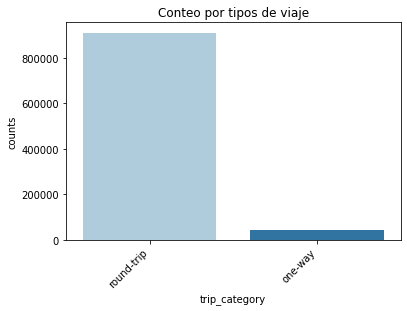

In [20]:
grafico_histograma_categorica(data_,'trip_category','bikeid',"trip_category","counts","Conteo por tipos de viaje")

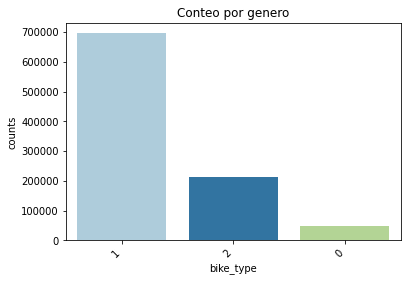

In [16]:
grafico_histograma_categorica(data_,'gender','bikeid',"bike_type","counts","Conteo por genero")

In [23]:
(data_['gender']==0).value_counts()

False    908780
True      46430
Name: gender, dtype: int64

Obs. Hay unos datos que tienen 0 en el género

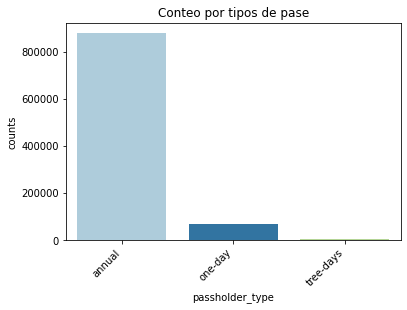

In [19]:
grafico_histograma_categorica(data_,'type_pass','bikeid',"passholder_type","counts","Conteo por tipos de pase")

<AxesSubplot:>

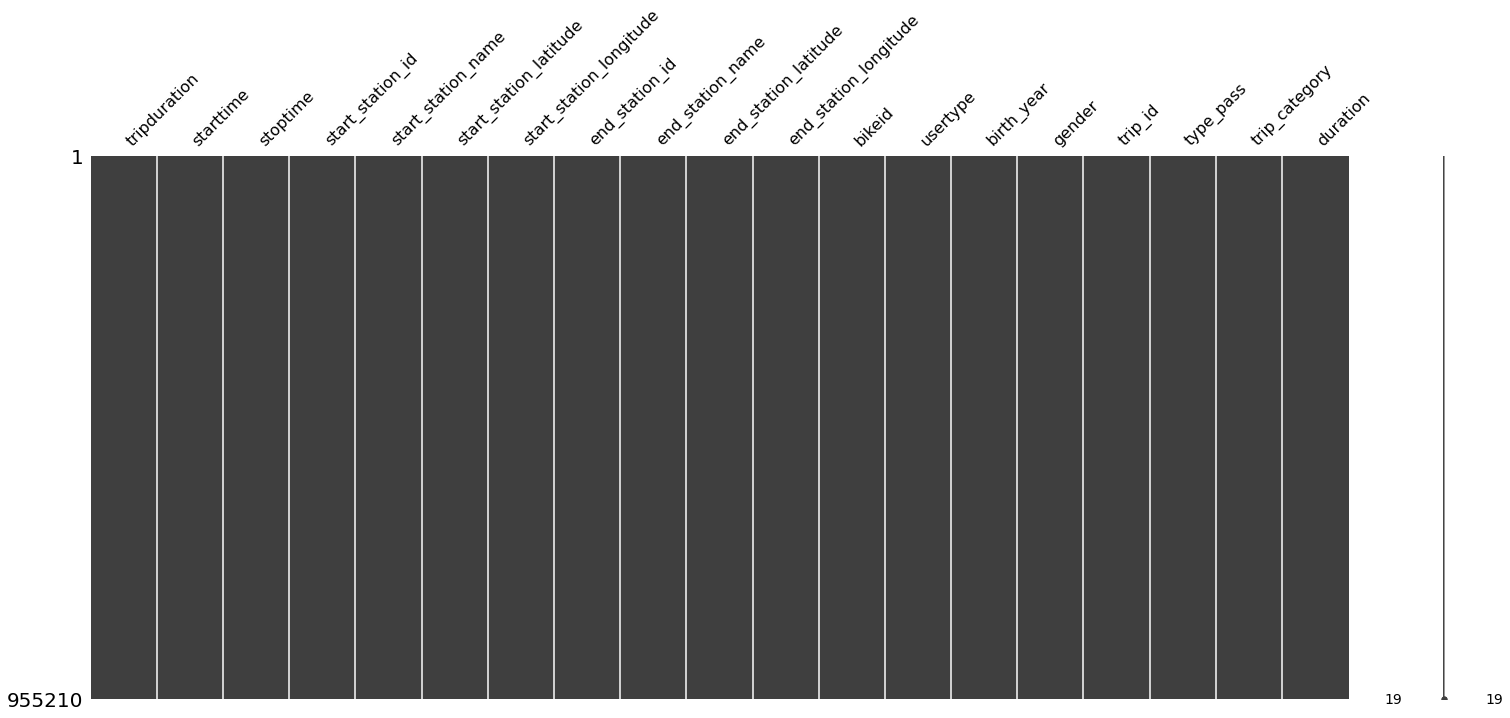

In [28]:
# Check for missing values.
%matplotlib inline
msno.matrix(data_)

Obs. No tenemos missing values

#### Creación de variables para el problema de Optimización

In [29]:
# Create label for rides that were charged based on current pricing plan.
def label_charged(duration):
    """"Function to create a new catergorical variable that indicate if theres has to be an adittional charge"""
    if duration <= 30:
        return 0
    else:
        return 1

data_['charged_ride'] = data_['duration'].apply(label_charged)

In [30]:
# Column for hour of day of ride.
data_['start_hour'] = data_['starttime'].dt.hour

In [31]:
latest_ride_date = data_['stoptime'].max()
latest_ride_date

Timestamp('2020-01-17 20:00:00')

In [32]:
bike_last_used_id = bike_last_used = data_.groupby('bikeid')['stoptime'].max().keys().tolist()
bike_last_used_date = data_.groupby('bikeid')['stoptime'].max().tolist()

In [33]:
# Number of bikes active each month in the past year.
for month in range(1,13):
    print(month, len([record for record in list(zip(bike_last_used_id,bike_last_used_date)) if 
                      record[1] > latest_ride_date + np.timedelta64(-month, 'M') ]))

1 12454
2 13816
3 13816
4 13816
5 13816
6 13816
7 13816
8 13816
9 13816
10 13816
11 13816
12 13816


In [34]:
# Number of inactive bikes (bikes that haven't been used in the past 6 months)
len([record for record in list(zip(bike_last_used_id,bike_last_used_date)) if 
     record[1] < latest_ride_date + np.timedelta64(-6, 'M') ])

0

In [35]:
# Create feature indicating active bikes, used in past 6 months. 1 if active, 0 if inactive.
inactive_ids = [record[0] for record in list(zip(bike_last_used_id,bike_last_used_date)) if 
                record[1] < latest_ride_date + np.timedelta64(-6, 'M') ]
data_['active_6m'] = data_['bikeid'].apply(lambda bike_id: 0 if bike_id in (inactive_ids) else 1)

In [36]:
#Select variables to modeling
data_ = data_ [["trip_id", "duration","starttime", "stoptime", "trip_category", "type_pass"]]

In [37]:
data_

,trip_id,duration,starttime,stoptime,trip_category,type_pass
0,1345,10.0,2019-12-01 00:00:00,2019-12-01 00:10:00,round-trip,annual
1,1347,12.0,2019-12-01 00:00:00,2019-12-01 00:12:00,round-trip,annual
2,1349,18.0,2019-12-01 00:00:00,2019-12-01 00:17:00,round-trip,annual
3,1350,21.0,2019-12-01 00:00:00,2019-12-01 00:21:00,round-trip,annual
4,1351,10.0,2019-12-01 00:00:00,2019-12-01 00:10:00,one-way,annual
...,...,...,...,...,...,...
955205,956539,8.0,2019-12-31 23:53:00,2020-01-01 00:00:00,round-trip,one-day
955206,956542,8.0,2019-12-31 23:53:00,2020-01-01 00:01:00,round-trip,one-day
955207,956544,30.0,2019-12-31 23:54:00,2020-01-01 00:24:00,round-trip,one-day
955208,956547,30.0,2019-12-31 23:55:00,2020-01-01 00:24:00,round-trip,one-day


In [41]:
import feather

data_ = data_.reset_index()
#Saving data to modeling
data_.to_feather('../data/data_clean.feather')